# Supernovae

*from the AQA A-level physics specification (September 2015 onwards)*
> Students should be familiar with the light curve of typical type 1a supernovae.

Type 1a supernovae is a special subclass of supernovae, and provides one of the best tools astronomers have to chart the growth rate of the expanding universe.  This is because all type 1a supernovae explode at about the same mass, and so their absolute magnitudes are all the same, making them very useful as "standard candles". All type 1a supernovae have a standard blue and visual magnitude of $$M_\mathrm{B} \approx M_\mathrm{V} \approx -19.3\pm 0.3$$ Recently, astronomers have compared nearby type 1a supernovae to more distant ones, determining that the universe is now accelerating in its expansion and is filled with mysterious "dark energy."

Data on the light curves of a number of type 1a supernova are available from the [CfA Supernova Archive](https://www.cfa.harvard.edu/supernova/index.html), which is funded in part by the National Science Foundation through grant AST 0907903.

As an example supernova, I picked data for SN1994ae, a supernova in galaxy NGC 3370 discovered by S. Van Dyk using an automated 0.76 meter telescope. The discovery image was taken on 14 November 1994.  Although supernovae are common, with one exploding every few seconds somewhere in the universe, this one was special. SN 1994ae was one of the nearest and best observed supernovae since the advent of modern, digital detectors. Extensive monitoring of the light curve in 5 colours was obtained beginning 2 weeks before maximum and provides one of the most complete photometric records of a supernova light curve (Riess et al. 1999). 


![title](supernova/1994ae.jpg)

The image on the left is from the 1.2-meter telescope at the Fred Lawrence Whipple Observatory (courtesy R. Schild/CfA) and was obtained in good conditions a few weeks after maximum light.  NGC 3370 is at a distance of 98 million light-years (30 megaparsecs) from Earth, and the supernova SN1994ae briefly outshone all of the tens of billions of other stars in its galaxy, peaking at an apparent magnitude of 13 in the visual.

The image on the right is from the Hubble Space Telescope 9 years later, by which time the supernova can no longer be detected. Many interesting features of the host galaxy (as well as other background galaxies) are blurred beyond recognition by the atmosphere in the ground-based image. The Hubble Space Telescope, which sits above the distorting atmosphere, captures great detail at exquisite resolution.

Having obtained some data, I now want to produce a suitable fit.  The [SN(oo)Py](http://csp.obs.carnegiescience.edu/data/snpy) python package ([Burns et al. (2010)](https://arxiv.org/abs/1010.4040)) allows this.  I followed the installation instructions, followed the advice to instal SNooPy with a separate python distribution (this was important as SNooPy was very 2-pythonic and threw lots of errors with python3).

After installation, the data needed a little massaging to get into the SNPy format.  I downloaded the 'SN1981D.txt' file as an example (and followed the first tutorial quite closely first to check SNPy was set us properly)  and then used awk:
```
cat SN1981D.txt | head -1 | sed 's/SN1981D/SN1994ae/g' > sn1994ae-raw.txt
echo 'filter Us' >> sn1994ae-raw.txt
awk '{print $1, $2, $3}' sn1994ae_UBVRI.dat >> sn1994ae-raw.txt
echo 'filter Bs' >> sn1994ae-raw.txt
awk '{print $1, $4, $5}' sn1994ae_UBVRI.dat >> sn1994ae-raw.txt
...
grep -v 99.999 sn1994ae-raw.txt > sn1994ae.txt
```

Then in SNPy:
```
s = get_sn('sn1994ae.txt')
s.fit()
s.dump_lc()  
```

![title](supernova/sn1994ae-snpyfit.png)

The command ```s.summary()``` gives the output below, suggesting that $T_{\mathrm{max}}=9685.3$.
```
--------------------------------------------------------------------------------
SN  SN1994ae
z = 0.0059          ra= 50.65992         dec=-37.23272 
Data in the following bands: Bs,  Is,  Vs,  Us,  Rs,  
Fit results (if any):
   EBVhost = 0.003  +/-  0.006  +/- 0.060 (sys)
   Tmax = 9685.334  +/-  0.071  +/- 0.340 (sys)
   DM = 32.407  +/-  0.007  +/- 0.180 (sys)
   dm15 = 0.924  +/-  0.007  +/- 0.060 (sys)
```

Now to plot the B-band light curve in matplotlib:


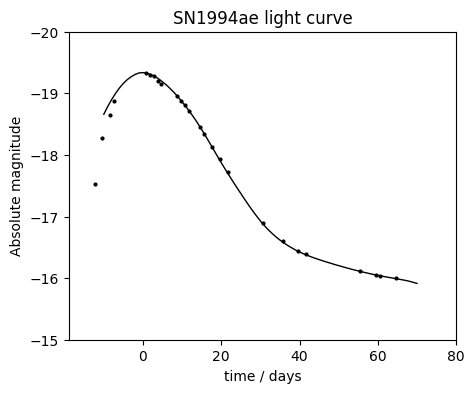

In [45]:
import numpy as np
import matplotlib.pyplot as plt

t1, Bmag, Berror = np.loadtxt('supernova/SN1994aeBdata.dat', usecols=(0,1,2),unpack=True)
t2, Bmagfit = np.loadtxt('supernova/SN1994aeBmodel.dat', usecols=(0,1), delimiter=", ", unpack=True)

fig, ax = plt.subplots(figsize=(5, 4))

#let's make a function to convert apparent to absolute magnitudes
def app2abs (apparent, dist):
    absolute = apparent - 5 * (np.log10(dist/10))
    return absolute

plt.rcdefaults()
ax.plot(t1-9685.3, app2abs(Bmag,30e6), 'ko' , markersize=2)
ax.plot(t2-9685.3, app2abs(Bmagfit,30e6), 'k-' , linewidth=1)
#ax.errorbar(t1, Bmag, yerr=Berror, fmt='ko', markersize=2)
plt.ylim(-15,-20)
plt.xlim(xmax=80)

plt.title('SN1994ae light curve')
plt.xlabel('time / days')
plt.ylabel('Absolute magnitude')

plt.show()


To first order, the B-band light curves of all SNIa look the same. 

Things to note:
- The $t$ axis is offset to that $t = 0$ corresponds to the time of maximum magnitude (in the B-band)
- The peak is at an absolute magnitude of about $-19.3$
- there is a *very* rapid increase in luminosity before the peak.  The brightness of the supernova can change by up to 3 magnitudes in 15 days
- After the peak at $t=0$ the light curve declines *fairly* rapidly for the next 3 - 4 weeks
- By about a month after maximum light, the decline rate has changed again (to a steady and slower decrease) 

The peak of the light curve is dominated by $^{56}\mathrm{Ni}$, and the light curve eventually flattens out then it is dominated by the radioactive decay of $^{56}\mathrm{Co}$.



### An aside: a general template from SNPy

In SNPy, a general curve can be obtained with
```
from snpy.dm15temp import dm15temp as dm

t = dm.template()

t.mktemplate(1.4)   

times=np.arange(-10,71,0.5) 

plt.plot(t.eval('B', times, z=0)[0])  

print(t.eval('B', times, z=0)[0]) 

```

## A better fit

A better fit for the light curve can be obtained if the data are analysed using a descriptive model ([Vacca & Leibundgut 1996](https://arxiv.org/abs/astro-ph/9608181)). For each supernova the observed light curve in each filter is fit with an empirical model consisting of a Gaussian (for the peak phase) atop a linear decay (late-time decline) and an exponentially
rising function (for the pre-maximum segment). The second Gaussian (to model the secondary maximum in the V , R, and I band light curves) is not needed in our case of the B-band, and thus the functional form of the fit ([Contardo et al. 2000](https://arxiv.org/abs/astro-ph/0005507)) is:
$$ m=\frac{ f_0 + \gamma(t − t_0) + g_0 \exp \left( -\frac{ (t−t_0 )^2}{ 2{\sigma_0}^2}\right) } {1- \exp{\left(\frac{\tau-t}{\theta}\right)} } $$

The first Gaussian and the decline are normalized to the phase $t_0$.  The exponential cutoff function for the rise has a characteristic time $\theta$ and a separate phase zero-point $\tau$.

The amplitude $g_0$ of the Gaussian, the intercept of the line, $f_0$ , the slope $\gamma$, the Gaussian phase $t_0$ and the width, $\sigma_0$ and the characteristic rise time $\theta$ and its phase $\tau$ are free parameters in the fit.

The fit was performed in ```gnuplot```, with some initial values supplied:
```
plot 'SN1994aeBdata.dat' u 1:2
f1(x) = f0
f2(x) =  gamma * (x-t0) 
f3(x) = g0 * exp( - ((x-t0)**2  / (2 * sig0**2)) ) 
denom(x) = 1 - exp( (tau-x) / theta ) 
mag(x) = (f1(x) + f2(x) + f3(x)) / denom(x) 
f1=10                                                                 
gamma=0.5
g0=-4
t0=9685.3
sig0=25
tau=9635
theta=10
fit mag(x) 'SN1994aeBdata.dat' u 1:2 via f0,gamma,g0,t0,sig0,tau,theta
```

\begin{align*}
f_0 &= 13.65~\mathrm{mag}\\
\gamma &= 0.0256~\mathrm{mag / day}\\
g_0 &= -6.114~\mathrm{mag}\\
t_0 &= 9672.28~\mathrm{JD}\\
\sigma_0 &= 26.06~\mathrm{days}\\
\tau &= 9648.58~\mathrm{JD}\\
\theta &= 34.15~\mathrm{days}\\
\end{align*}

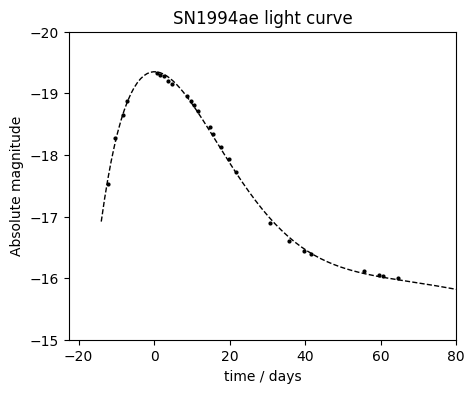

In [59]:
import numpy as np
import matplotlib.pyplot as plt

t1, Bmag, Berror = np.loadtxt('supernova/SN1994aeBdata.dat', usecols=(0,1,2),unpack=True)

f0 = 13.6506 
gamma = 0.0256365
g0 = -6.11433
t0 = 9672.28
sig0 = 26.0608
tau = 9648.58
theta = 34.1494

t=np.linspace(9686.3-15,9844,200)

mag = ( f0 + gamma * (t-t0) + g0 * np.exp (-((t-t0)**2)/(2*sig0**2) ) ) / (1-np.exp((tau-t)/theta))

#let's make a function to convert apparent to absolute magnitudes
def app2abs (apparent, dist):
    absolute = apparent - 5 * (np.log10(dist/10))
    return absolute

fig, ax = plt.subplots(figsize=(5, 4))

plt.rcdefaults()
ax.plot(t-9685.3, app2abs(mag,30e6), 'k--', linewidth=1)
ax.plot(t1-9685.3, app2abs(Bmag,30e6), 'ko' , markersize=2)
#ax.errorbar(t1, Bmag, yerr=Berror, fmt='ko', markersize=2)
plt.ylim(-15,-20)
plt.xlim(xmax=80)

plt.title('SN1994ae light curve')
plt.xlabel('time / days')
plt.ylabel('Absolute magnitude')

plt.show()

## A sketch version of the graph

To express the general-fit nature of the 1a light curve, the figure is now given a sketched look (the [XKCD functionality](http://jakevdp.github.io/blog/2013/07/10/XKCD-plots-in-matplotlib/) now built into matplotlib - all credit to Jake Vanderplas of [Pythonic Perambulations](http://jakevdp.github.com/blog/2012/10/07/xkcd-style-plots-in-matplotlib/) who designed the [XKCDify](http://jakevdp.github.io/blog/2012/10/07/xkcd-style-plots-in-matplotlib/) hack) and a cartoonish font that enhances the overall effect. Using a sketch style conveys to the viewer that the curve is a generalization, and that it is the higher-level concepts rather than low-level details that are important. 

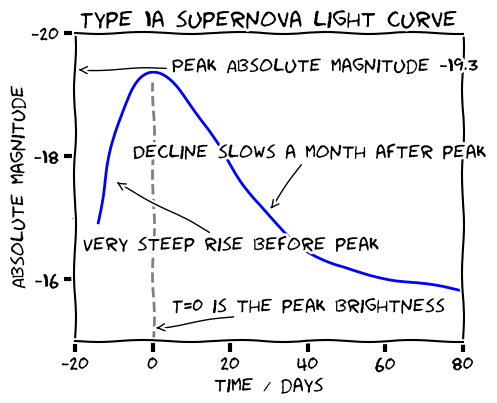

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

t1, Bmag, Berror = np.loadtxt('supernova/SN1994aeBdata.dat', usecols=(0,1,2),unpack=True)

f0 = 13.6506 
gamma = 0.0256365
g0 = -6.11433
t0 = 9672.28
sig0 = 26.0608
tau = 9648.58
theta = 34.1494

t=np.linspace(9686.3-15,9844,200)

mag = ( f0 + gamma * (t-t0) + g0 * np.exp (-((t-t0)**2)/(2*sig0**2) ) ) / (1-np.exp((tau-t)/theta))

#let's make a function to convert apparent to absolute magnitudes
def app2abs (apparent, dist):
    absolute = apparent - 5 * (np.log10(dist/10))
    return absolute

fig, ax = plt.subplots(figsize=(5, 4))

plt.xkcd()

ax.plot(t-9685.3, app2abs(mag,30e6), 'b-', linewidth=2)
plt.xlim(-20,80)
plt.ylim(-15,-20)
majorLocator = MultipleLocator(2)
minorLocator = MultipleLocator(1)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)

plt.title('Type 1a supernova light curve')
plt.xlabel('time / days')
plt.ylabel('Absolute magnitude')

plt.axvline(x=0,ymin=0,ymax=0.84, color='.5', ls='--')

#plt.annotate( '$^4_2\mathrm{He}$', xy=(0,7.3) )
plt.annotate( 'T=0 is the peak brightness', xy=(0,-15.2), \
             arrowprops=dict(arrowstyle='->'), xytext=(5,-15.5) )
plt.annotate( 'Very steep rise before peak', xy=(-10,-17.6), \
             arrowprops=dict(arrowstyle='->'), xytext=(-18,-16.5) )
plt.annotate( 'Peak Absolute magnitude -19.3', xy=(-20,-19.4), \
             arrowprops=dict(arrowstyle='->'), xytext=(5,-19.4) )
plt.annotate( 'Decline slows a month after peak', xy=(30,-17.1), \
             arrowprops=dict(arrowstyle='->'), xytext=(-5,-18) )

plt.show()

## References

1. Wikipedia supernovae
2. NASA Image library